<a href="https://colab.research.google.com/github/JKH-ML/python/blob/main/numpy_and_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 12.4032, W: 0.3726, b: 0.6821
Epoch 100, Loss: 0.0202, W: 2.5897, b: 2.2058
Epoch 200, Loss: 0.0088, W: 2.8665, b: 2.0658
Epoch 300, Loss: 0.0081, W: 2.9330, b: 2.0322
Epoch 400, Loss: 0.0081, W: 2.9490, b: 2.0241
Epoch 500, Loss: 0.0081, W: 2.9528, b: 2.0221
Epoch 600, Loss: 0.0081, W: 2.9537, b: 2.0217
Epoch 700, Loss: 0.0081, W: 2.9540, b: 2.0215
Epoch 800, Loss: 0.0081, W: 2.9540, b: 2.0215
Epoch 900, Loss: 0.0081, W: 2.9540, b: 2.0215


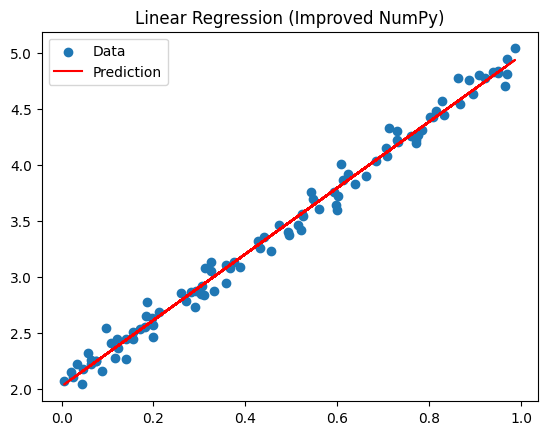

In [5]:
# Linear Regression (NumPy)

import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 (y = 3x + 2 + noise)
np.random.seed(42)
X = np.random.rand(100, 1)
y = 3 * X + 2 + 0.1 * np.random.randn(100, 1)

# 파라미터 초기화
W = np.random.randn(1, 1) * 0.01  # shape: (1, 1)
b = np.zeros((1,))               # shape: (1,)
lr = 0.1
epochs = 1000

losses = []
for epoch in range(epochs):
    # 순전파
    y_pred = X @ W + b
    loss = np.mean((y_pred - y) ** 2)
    losses.append(loss)

    # 역전파
    grad_W = (2 / len(X)) * X.T @ (y_pred - y)  # shape: (1, 1)
    grad_b = (2 / len(X)) * np.sum(y_pred - y)  # shape: (1,)

    # 파라미터 업데이트
    W -= lr * grad_W
    b -= lr * grad_b

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, W: {W.item():.4f}, b: {b.item():.4f}")

# 결과 시각화
plt.scatter(X, y, label="Data")
plt.plot(X, X @ W + b, color="red", label="Prediction")
plt.legend()
plt.title("Linear Regression (NumPy)")
plt.show()


Epoch 0, Loss: 19.8650
Epoch 100, Loss: 0.0209
Epoch 200, Loss: 0.0107
Epoch 300, Loss: 0.0100
Epoch 400, Loss: 0.0099
Epoch 500, Loss: 0.0099
Epoch 600, Loss: 0.0099
Epoch 700, Loss: 0.0099
Epoch 800, Loss: 0.0099
Epoch 900, Loss: 0.0099


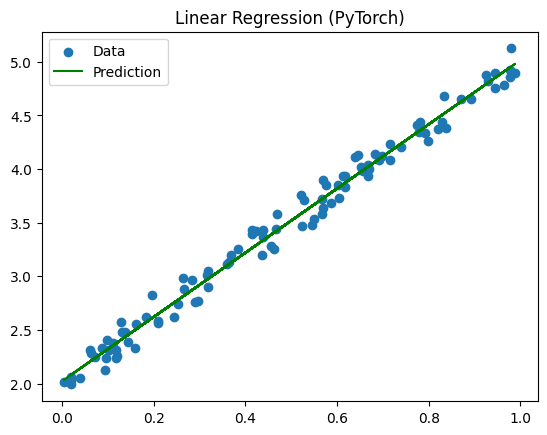

In [4]:
# Linear Regression (PyTorch)
import torch
import torch.nn as nn
import torch.optim as optim

# 데이터 생성
X_torch = torch.tensor(X, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)

# 모델 정의
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 학습
for epoch in range(1000):
    y_pred = model(X_torch)
    loss = criterion(y_pred, y_torch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# 시각화
predicted = model(X_torch).detach().numpy()
plt.scatter(X, y, label="Data")
plt.plot(X, predicted, color='green', label="Prediction")
plt.legend()
plt.title("Linear Regression (PyTorch)")
plt.show()


Epoch 0, Loss: 3.3157
Epoch 100, Loss: 0.0392
Epoch 200, Loss: 0.0254
Epoch 300, Loss: 0.0199
Epoch 400, Loss: 0.0168
Epoch 500, Loss: 0.0147
Epoch 600, Loss: 0.0132
Epoch 700, Loss: 0.0121
Epoch 800, Loss: 0.0111
Epoch 900, Loss: 0.0104


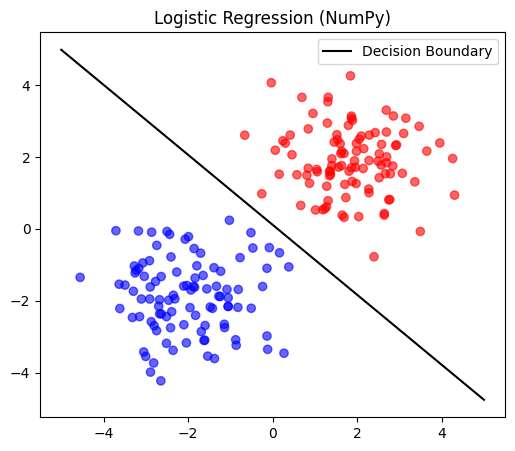

In [6]:
# Logistic Regression (NumPy)
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성: 이진 분류 문제
np.random.seed(0)
num_samples = 100

X_class0 = np.random.randn(num_samples, 2) + np.array([-2, -2])
X_class1 = np.random.randn(num_samples, 2) + np.array([2, 2])

X = np.vstack([X_class0, X_class1])  # (200, 2)
y = np.hstack([np.zeros(num_samples), np.ones(num_samples)]).reshape(-1, 1)  # (200, 1)

# 시그모이드 함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 이진 크로스 엔트로피 손실
def binary_cross_entropy(y_pred, y_true):
    eps = 1e-8  # 로그 안정화
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

# 파라미터 초기화
W = np.random.randn(2, 1)
b = np.zeros((1,))
lr = 0.1
epochs = 1000

losses = []
for epoch in range(epochs):
    z = X @ W + b        # (200, 1)
    y_pred = sigmoid(z)  # (200, 1)
    loss = binary_cross_entropy(y_pred, y)
    losses.append(loss)

    # 경사 계산
    grad_W = X.T @ (y_pred - y) / len(X)  # (2, 1)
    grad_b = np.mean(y_pred - y)          # (1,)

    # 업데이트
    W -= lr * grad_W
    b -= lr * grad_b

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# 결정 경계 시각화
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', alpha=0.6)
x1 = np.linspace(-5, 5, 100)
x2 = -(W[0] * x1 + b) / W[1]
plt.plot(x1, x2.ravel(), color='black', label='Decision Boundary')
plt.title("Logistic Regression (NumPy)")
plt.legend()
plt.show()


Epoch 0, Loss: 0.5041
Epoch 100, Loss: 0.0363
Epoch 200, Loss: 0.0239
Epoch 300, Loss: 0.0189
Epoch 400, Loss: 0.0160
Epoch 500, Loss: 0.0141
Epoch 600, Loss: 0.0127
Epoch 700, Loss: 0.0116
Epoch 800, Loss: 0.0107
Epoch 900, Loss: 0.0100


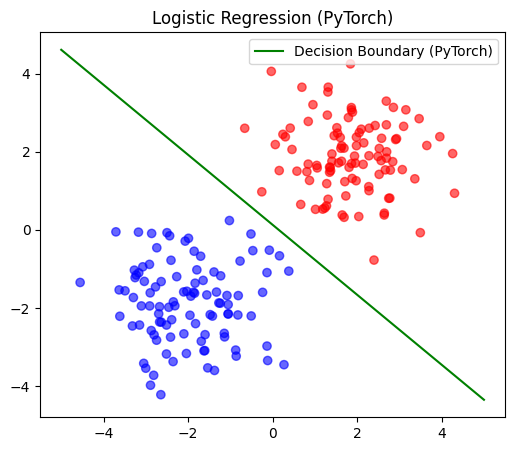

In [7]:
# Logistic Regression (PyTorch)
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 데이터 생성 (NumPy와 동일하게)
np.random.seed(0)
num_samples = 100
X_class0 = np.random.randn(num_samples, 2) + np.array([-2, -2])
X_class1 = np.random.randn(num_samples, 2) + np.array([2, 2])

X = np.vstack([X_class0, X_class1])  # (200, 2)
y = np.hstack([np.zeros(num_samples), np.ones(num_samples)]).reshape(-1, 1)  # (200, 1)

# 텐서로 변환
X_torch = torch.tensor(X, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)

# 모델 정의 (로지스틱 회귀는 선형 + 시그모이드)
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 학습
for epoch in range(1000):
    y_pred = model(X_torch)
    loss = criterion(y_pred, y_torch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# 결정 경계 시각화
with torch.no_grad():
    W, b = model[0].weight[0], model[0].bias
    W = W.numpy()
    b = b.numpy()
    x1 = np.linspace(-5, 5, 100)
    x2 = -(W[0] * x1 + b) / W[1]

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', alpha=0.6)
plt.plot(x1, x2, color='green', label='Decision Boundary (PyTorch)')
plt.title("Logistic Regression (PyTorch)")
plt.legend()
plt.show()


In [11]:
import numpy as np

# XOR 데이터
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])

# 활성화 함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(a):
    return a * (1 - a)

# 파라미터 초기화 (2-8-1 구조)
np.random.seed(1)
W1 = np.random.randn(2, 8)
b1 = np.zeros((1, 8))
W2 = np.random.randn(8, 1)
b2 = np.zeros((1, 1))

lr = 1.0
epochs = 10000

for epoch in range(epochs):
    # 순전파
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    # 손실
    eps = 1e-8
    loss = -np.mean(y * np.log(a2 + eps) + (1 - y) * np.log(1 - a2 + eps))

    # 역전파
    dz2 = a2 - y
    dW2 = a1.T @ dz2 / len(X)
    db2 = np.mean(dz2, axis=0)

    dz1 = dz2 @ W2.T * sigmoid_deriv(a1)
    dW1 = X.T @ dz1 / len(X)
    db1 = np.mean(dz1, axis=0)

    # 업데이트
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# 예측
pred = (a2 > 0.5).astype(int)
print("\n예측 결과:")
print(pred.ravel())
print("정답:")
print(y.ravel())


Epoch 0, Loss: 0.7144
Epoch 1000, Loss: 0.0085
Epoch 2000, Loss: 0.0034
Epoch 3000, Loss: 0.0021
Epoch 4000, Loss: 0.0015
Epoch 5000, Loss: 0.0011
Epoch 6000, Loss: 0.0009
Epoch 7000, Loss: 0.0008
Epoch 8000, Loss: 0.0007
Epoch 9000, Loss: 0.0006

예측 결과:
[0 1 1 0]
정답:
[0 1 1 0]


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

# XOR 데이터
X = torch.tensor([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=torch.float32)

y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# 모델 정의: 2-8-1 구조, Sigmoid 활성화
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.Sigmoid(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1.0)

# 학습
for epoch in range(10000):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# 예측
with torch.no_grad():
    output = model(X)
    pred = (output > 0.5).int()
    print("\n예측 결과:", pred.view(-1).numpy())
    print("정답:", y.view(-1).numpy())


Epoch 0, Loss: 0.7071
Epoch 1000, Loss: 0.0154
Epoch 2000, Loss: 0.0038
Epoch 3000, Loss: 0.0020
Epoch 4000, Loss: 0.0014
Epoch 5000, Loss: 0.0010
Epoch 6000, Loss: 0.0008
Epoch 7000, Loss: 0.0007
Epoch 8000, Loss: 0.0006
Epoch 9000, Loss: 0.0005

예측 결과: [0 1 1 0]
정답: [0. 1. 1. 0.]


In [15]:
import numpy as np
import urllib.request

# 🌸 Iris 데이터셋 수동 로딩 (UCI)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = urllib.request.urlopen(url)
raw_data = response.read().decode("utf-8").strip().split("\n")

X = []
y = []
label_map = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}

for row in raw_data:
    if not row:
        continue
    items = row.split(",")
    X.append([float(i) for i in items[:4]])
    y.append(label_map[items[4]])

X = np.array(X)  # shape: (150, 4)
y = np.array(y).reshape(-1, 1)  # shape: (150, 1)

# One-hot 인코딩 (NumPy로 직접)
def one_hot(y, num_classes):
    out = np.zeros((len(y), num_classes))
    out[np.arange(len(y)), y.flatten()] = 1
    return out

y_onehot = one_hot(y, 3)

# 데이터 정규화
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 학습/테스트 분할
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(len(X) * 0.8)
train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y_onehot[train_idx], y_onehot[test_idx]

# 소프트맥스
def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)  # 안정성
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# 손실 함수
def cross_entropy(pred, true):
    eps = 1e-8
    return -np.mean(np.sum(true * np.log(pred + eps), axis=1))

# 파라미터 초기화
W = np.random.randn(4, 3) * 0.01
b = np.zeros((1, 3))
lr = 0.1
epochs = 1000

# 학습
for epoch in range(epochs):
    z = X_train @ W + b
    y_pred = softmax(z)
    loss = cross_entropy(y_pred, y_train)

    # 역전파
    dz = y_pred - y_train
    dW = X_train.T @ dz / len(X_train)
    db = np.mean(dz, axis=0, keepdims=True)

    W -= lr * dW
    b -= lr * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# 테스트 정확도
z_test = X_test @ W + b
y_test_pred = softmax(z_test)
acc = np.mean(np.argmax(y_test_pred, axis=1) == np.argmax(y_test, axis=1))
print(f"\n✅ 테스트 정확도: {acc * 100:.2f}%")


Epoch 0, Loss: 1.0967
Epoch 100, Loss: 0.3204
Epoch 200, Loss: 0.2558
Epoch 300, Loss: 0.2178
Epoch 400, Loss: 0.1921
Epoch 500, Loss: 0.1734
Epoch 600, Loss: 0.1594
Epoch 700, Loss: 0.1484
Epoch 800, Loss: 0.1396
Epoch 900, Loss: 0.1324

✅ 테스트 정확도: 96.67%


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Iris 데이터 로드 및 전처리
iris = load_iris()
X, y = iris.data, iris.target  # X.shape: (150, 4), y.shape: (150,)

# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Dataset 클래스 정의
class IrisDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = IrisDataset(X_train, y_train)
test_dataset = IrisDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 3. 모델 정의 (Softmax 분류기)
model = nn.Sequential(
    nn.Linear(4, 3)  # 입력: 4, 출력 클래스 수: 3
)

criterion = nn.CrossEntropyLoss()  # 내부적으로 softmax 포함됨
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 학습 루프
for epoch in range(100):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss / len(train_loader):.4f}")

# 5. 테스트 정확도
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        pred = torch.argmax(y_pred, dim=1)
        correct += (pred == y_batch).sum().item()
        total += y_batch.size(0)

print(f"\n✅ 테스트 정확도: {100 * correct / total:.2f}%")


Epoch 0, Loss: 1.0978
Epoch 10, Loss: 0.4483
Epoch 20, Loss: 0.3489
Epoch 30, Loss: 0.2874
Epoch 40, Loss: 0.2490
Epoch 50, Loss: 0.2004
Epoch 60, Loss: 0.1789
Epoch 70, Loss: 0.1648
Epoch 80, Loss: 0.1582
Epoch 90, Loss: 0.1415

✅ 테스트 정확도: 100.00%


In [27]:
# 셀 1️⃣: 데이터 불러오기 (NumPy만 사용)
import numpy as np
import urllib.request
import os

def download_mnist_npz():
    url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
    filename = "mnist.npz"
    if not os.path.exists(filename):
        print("📦 MNIST 데이터 다운로드 중...")
        urllib.request.urlretrieve(url, filename)
        print("✅ 다운로드 완료.")
    return filename

# 데이터 로드
file = download_mnist_npz()
with np.load(file) as data:
    X_train = data["x_train"].reshape(-1, 28 * 28) / 255.0
    y_train = data["y_train"]
    X_test = data["x_test"].reshape(-1, 28 * 28) / 255.0
    y_test = data["y_test"]

# One-hot 인코딩
def one_hot(y, num_classes=10):
    out = np.zeros((len(y), num_classes))
    out[np.arange(len(y)), y] = 1
    return out

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)


In [28]:
# 셀 2️⃣: MLP 모델 학습 (NumPy만 사용)

# 활성화 함수
def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

def softmax(x):
    x -= np.max(x, axis=1, keepdims=True)
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy(pred, true):
    eps = 1e-8
    return -np.mean(np.sum(true * np.log(pred + eps), axis=1))

# 파라미터 초기화
np.random.seed(42)
W1 = np.random.randn(784, 128) * 0.01
b1 = np.zeros((1, 128))
W2 = np.random.randn(128, 64) * 0.01
b2 = np.zeros((1, 64))
W3 = np.random.randn(64, 10) * 0.01
b3 = np.zeros((1, 10))

lr = 0.1
batch_size = 64
epochs = 5

# 학습 루프
for epoch in range(epochs):
    indices = np.random.permutation(len(X_train))
    X_shuffled = X_train[indices]
    y_shuffled = y_train_oh[indices]

    for i in range(0, len(X_train), batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        # 순전파
        z1 = X_batch @ W1 + b1
        a1 = relu(z1)
        z2 = a1 @ W2 + b2
        a2 = relu(z2)
        z3 = a2 @ W3 + b3
        a3 = softmax(z3)

        # 손실 및 역전파
        dz3 = a3 - y_batch
        dW3 = a2.T @ dz3 / batch_size
        db3 = np.mean(dz3, axis=0, keepdims=True)

        dz2 = dz3 @ W3.T * relu_deriv(z2)
        dW2 = a1.T @ dz2 / batch_size
        db2 = np.mean(dz2, axis=0, keepdims=True)

        dz1 = dz2 @ W2.T * relu_deriv(z1)
        dW1 = X_batch.T @ dz1 / batch_size
        db1 = np.mean(dz1, axis=0, keepdims=True)

        # 업데이트
        W3 -= lr * dW3
        b3 -= lr * db3
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    print(f"Epoch {epoch+1}, Loss: {cross_entropy(a3, y_batch):.4f}")


Epoch 1, Loss: 0.4541
Epoch 2, Loss: 0.2361
Epoch 3, Loss: 0.2121
Epoch 4, Loss: 0.4183
Epoch 5, Loss: 0.1543



✅ 총 10000개 중 9666개 맞춤
🎯 정확도: 96.66%


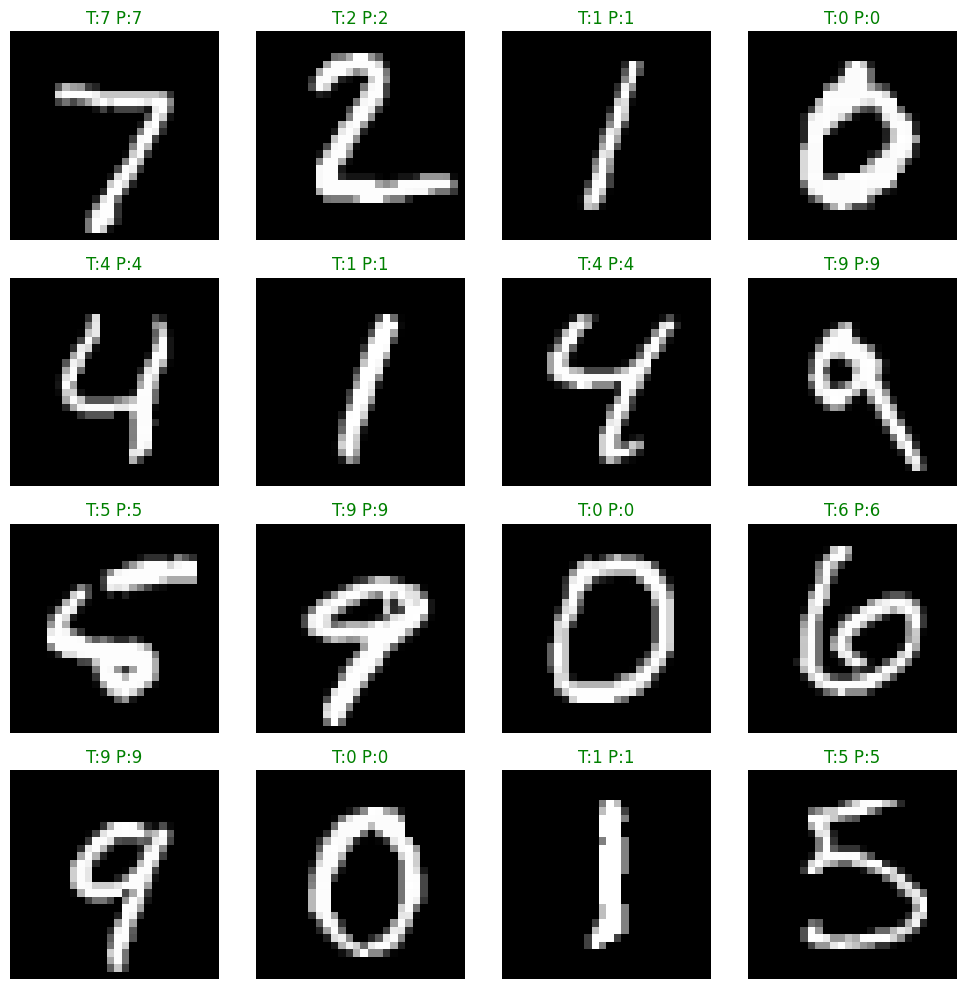

In [29]:
# 셀 3️⃣: 시각화 + 정확도 평가

import matplotlib.pyplot as plt

# 예측 수행
z1 = X_test @ W1 + b1
a1 = relu(z1)
z2 = a1 @ W2 + b2
a2 = relu(z2)
z3 = a2 @ W3 + b3
a3 = softmax(z3)

pred = np.argmax(a3, axis=1)
correct = (pred == y_test).sum()
total = len(y_test)
accuracy = correct / total

# 결과 출력
print(f"\n✅ 총 {total}개 중 {correct}개 맞춤")
print(f"🎯 정확도: {accuracy * 100:.2f}%")

# 시각화 (앞 16개만)
num_images = min(16, total)
plt.figure(figsize=(10, 10))

for i in range(num_images):
    img = X_test[i].reshape(28, 28)
    true_label = y_test[i]
    pred_label = pred[i]
    color = "green" if pred_label == true_label else "red"

    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"T:{true_label} P:{pred_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [30]:
# 셀 1️⃣: MNIST 데이터 로딩 (라이브러리 사용)
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 데이터 전처리
transform = transforms.Compose([
    transforms.ToTensor(),              # [0, 255] → [0.0, 1.0]
    transforms.Normalize((0.5,), (0.5,))  # 평균 0, 표준편차 1로 정규화
])

# 학습/테스트 데이터셋 다운로드 및 로드
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 53.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 10.2MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 58.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.48MB/s]


In [31]:
# 셀 2️⃣: MLP 학습 (PyTorch 사용)
import torch.nn as nn
import torch.optim as optim

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),          # 28x28 → 784
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

# 모델, 손실함수, 옵티마이저 정의
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
for epoch in range(5):
    model.train()
    total_loss = 0
    for x, y in train_loader:
        y_pred = model(x)
        loss = criterion(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")


Epoch 1, Loss: 0.3988
Epoch 2, Loss: 0.1897
Epoch 3, Loss: 0.1361
Epoch 4, Loss: 0.1127
Epoch 5, Loss: 0.0977



✅ 총 10000개 중 9676개 맞춤
🎯 정확도: 96.76%


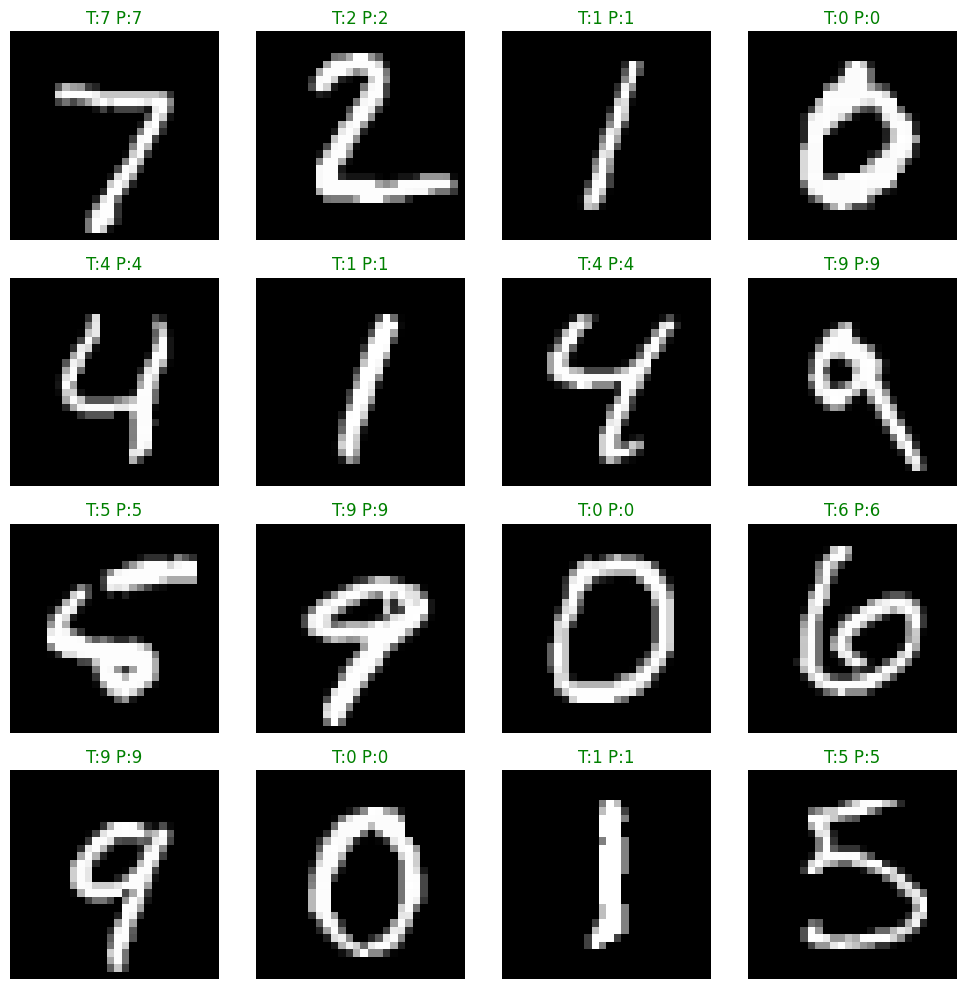

In [33]:
# 셀 3️⃣: 시각화 + 정확도 평가 (수정)

import matplotlib.pyplot as plt

model.eval()
correct = 0
total = 0
images = []
preds = []
labels = []

# 예측 결과 저장
with torch.no_grad():
    for x, y in test_loader:
        output = model(x)
        pred = torch.argmax(output, dim=1)
        correct += (pred == y).sum().item()
        total += y.size(0)

        for i in range(x.size(0)):
            if len(images) >= 16:
                break
            images.append(x[i])
            preds.append(pred[i])
            labels.append(y[i])

# 결과 출력
print(f"\n✅ 총 {total}개 중 {correct}개 맞춤")
print(f"🎯 정확도: {correct / total * 100:.2f}%")

# 시각화
num_images = len(images)
plt.figure(figsize=(10, 10))
for i in range(num_images):
    img = images[i].squeeze().numpy()
    true_label = labels[i].item()
    pred_label = preds[i].item()
    color = "green" if true_label == pred_label else "red"

    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T:{true_label} P:{pred_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
import urllib.request
import os

# 다운로드 및 로딩
def download_mnist_npz():
    url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
    filename = "mnist.npz"
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url, filename)
    return filename

file = download_mnist_npz()
with np.load(file) as data:
    X_train = data["x_train"][:1000].astype(np.float32) / 255.0
    y_train = data["y_train"][:1000]
    X_test = data["x_test"][:200].astype(np.float32) / 255.0
    y_test = data["y_test"][:200]

X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

def one_hot(y, num_classes=10):
    out = np.zeros((len(y), num_classes))
    out[np.arange(len(y)), y] = 1
    return out

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)


In [6]:
def conv2d(x, w, b):
    N, C, H, W = x.shape
    F, _, KH, KW = w.shape
    pad = 1
    stride = 1
    out_h = (H + 2*pad - KH) // stride + 1
    out_w = (W + 2*pad - KW) // stride + 1
    out = np.zeros((N, F, out_h, out_w))
    x_padded = np.pad(x, ((0,0), (0,0), (pad,pad), (pad,pad)))

    for n in range(N):
        for f in range(F):
            for i in range(out_h):
                for j in range(out_w):
                    region = x_padded[n, :, i:i+KH, j:j+KW]
                    out[n, f, i, j] = np.sum(region * w[f]) + b[f]
    return out

def relu(x): return np.maximum(0, x)

def maxpool2d(x, size=2, stride=2):
    N, C, H, W = x.shape
    out_h = (H - size) // stride + 1
    out_w = (W - size) // stride + 1
    out = np.zeros((N, C, out_h, out_w))
    for n in range(N):
        for c in range(C):
            for i in range(out_h):
                for j in range(out_w):
                    region = x[n, c, i*stride:i*stride+size, j*stride:j*stride+size]
                    out[n, c, i, j] = np.max(region)
    return out

def flatten(x): return x.reshape(x.shape[0], -1)

def softmax(x):
    x -= np.max(x, axis=1, keepdims=True)
    exp = np.exp(x)
    return exp / np.sum(exp, axis=1, keepdims=True)

def cross_entropy(pred, true):
    eps = 1e-8
    return -np.mean(np.sum(true * np.log(pred + eps), axis=1))


In [7]:
# 초기화
np.random.seed(0)
W_conv = np.random.randn(1, 1, 3, 3) * 0.1  # 1개 필터
b_conv = np.zeros((1,))
W_fc = np.random.randn(196, 10) * 0.1       # 14x14
b_fc = np.zeros((1, 10))

lr = 0.01
epochs = 5
batch_size = 32

for epoch in range(epochs):
    indices = np.random.permutation(len(X_train))
    X_shuffled = X_train[indices]
    y_shuffled = y_train_oh[indices]

    for i in range(0, len(X_train), batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        # 순전파
        z1 = conv2d(X_batch, W_conv, b_conv)
        a1 = relu(z1)
        p1 = maxpool2d(a1)
        flat = flatten(p1)
        z2 = flat @ W_fc + b_fc
        y_pred = softmax(z2)

        # 손실 + 역전파 (FC만 학습)
        loss = cross_entropy(y_pred, y_batch)
        dz2 = (y_pred - y_batch) / batch_size
        dW_fc = flat.T @ dz2
        db_fc = np.sum(dz2, axis=0, keepdims=True)

        W_fc -= lr * dW_fc
        b_fc -= lr * db_fc

    print(f"Epoch {epoch+1}, Loss: {loss:.4f}")


Epoch 1, Loss: 2.2186
Epoch 2, Loss: 2.2601
Epoch 3, Loss: 2.2784
Epoch 4, Loss: 2.1026
Epoch 5, Loss: 2.0930



✅ 총 200개 중 89개 맞춤
🎯 정확도: 44.50%


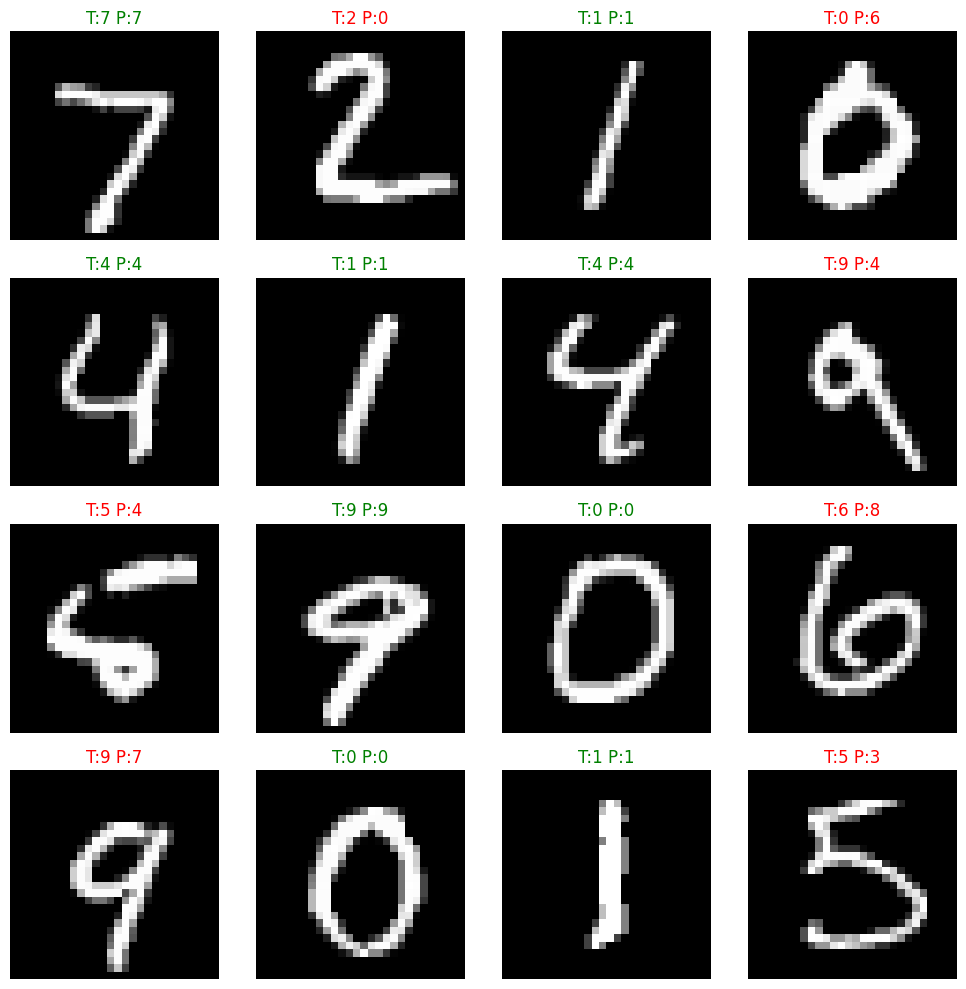

In [8]:
import matplotlib.pyplot as plt

z1 = conv2d(X_test, W_conv, b_conv)
a1 = relu(z1)
p1 = maxpool2d(a1)
flat = flatten(p1)
z2 = flat @ W_fc + b_fc
a3 = softmax(z2)

pred = np.argmax(a3, axis=1)
correct = (pred == y_test).sum()
total = len(y_test)

print(f"\n✅ 총 {total}개 중 {correct}개 맞춤")
print(f"🎯 정확도: {correct / total * 100:.2f}%")

plt.figure(figsize=(10, 10))
for i in range(16):
    img = X_test[i, 0]
    true = y_test[i]
    pred_label = pred[i]
    color = "green" if true == pred_label else "red"
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"T:{true} P:{pred_label}", color=color)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 데이터 전처리
transform = transforms.Compose([
    transforms.ToTensor(),  # [0, 255] → [0.0, 1.0]
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST 평균/표준편차
])

# 학습 / 테스트 데이터셋
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=1000, shuffle=False)


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.12MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.26MB/s]


In [2]:
import torch.nn as nn
import torch.optim as optim

# CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # 1x28x28 → 16x28x28
            nn.ReLU(),
            nn.MaxPool2d(2),                             # → 16x14x14
            nn.Conv2d(16, 32, kernel_size=3, padding=1), # → 32x14x14
            nn.ReLU(),
            nn.MaxPool2d(2)                              # → 32x7x7
        )
        self.fc = nn.Sequential(
            nn.Flatten(),                                # → 32*7*7 = 1568
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

# 모델 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 학습
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")


Epoch 1, Loss: 0.1491
Epoch 2, Loss: 0.0491
Epoch 3, Loss: 0.0333
Epoch 4, Loss: 0.0265
Epoch 5, Loss: 0.0197



✅ 총 10000개 중 9888개 맞춤
🎯 정확도: 98.88%


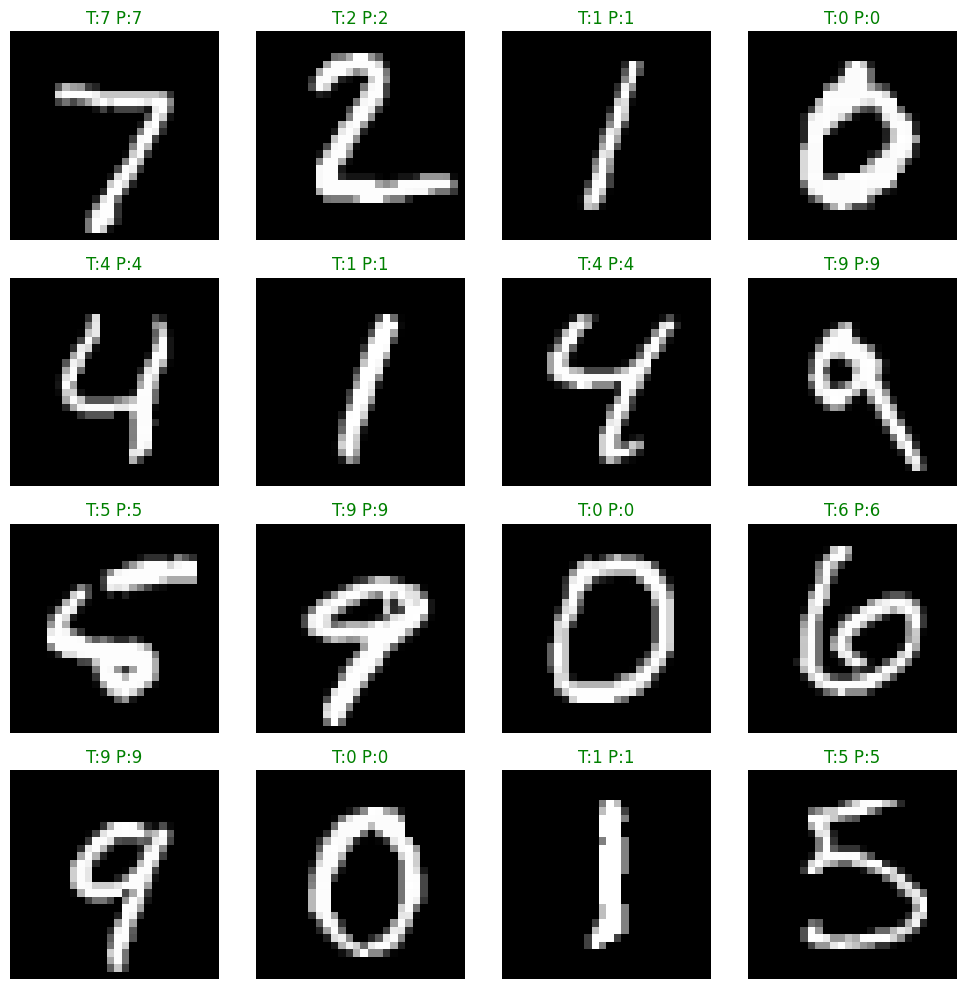

In [6]:
import matplotlib.pyplot as plt

model.eval()
correct = 0
total = 0
images, preds, labels = [], [], []

# 테스트 전체 반복 + 시각화용 16개 수집
with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        output = model(X)
        pred = output.argmax(dim=1)
        correct += (pred == y).sum().item()
        total += y.size(0)

        # 시각화용 이미지 수집 (최대 16개)
        for i in range(len(X)):
            if len(images) >= 16:
                break
            images.append(X[i])
            preds.append(pred[i])
            labels.append(y[i])

print(f"\n✅ 총 {total}개 중 {correct}개 맞춤")
print(f"🎯 정확도: {correct / total * 100:.2f}%")

# 시각화
num_images = len(images)
plt.figure(figsize=(10, 10))
for i in range(num_images):
    img = images[i].cpu().squeeze().numpy()
    true = labels[i].item()
    pred_label = preds[i].item()
    color = "green" if true == pred_label else "red"

    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"T:{true} P:{pred_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()
